In [1]:
import numpy as np
import pandas as pd
import imblearn                                    
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd                                               
import sklearn
import xgboost
from xgboost import XGBClassifier 
from xgboost import cv
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

/Users/gaskell/miniforge_x86_64/envs/ADPred_new/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data = pd.read_csv('initial_preprocessing.csv')
data = data[data['3MResponse'] != 'Unknown']    ### We don't need unknown category for method-1

In [3]:
data

,3MResponse,grp,Type I IFN activity,IFNβ activity final,IFNα activity final,IFNβ/α ratio final,pres_imuran,pres_minocin,nonpresNSAIDs_use,NSAIDs_use,...,tender_jts_28_BL,swollen_jts_28_BL,md_global_assess_BL,pt_global_assess_BL,di_BL,pt_pain_BL,usresultsCRP_BL,usresultsIgA_BL,usresultsIgG_BL,usresultsIgM_BL
0,Good,0,0.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,5,3,35.0,10.0,0.00,10.0,4.41,284.0,1640.0,94.0
1,No Response,1,0.814954,0.714954,0.714954,1.000000,0.0,0.0,1.0,NaN,...,3,3,35.0,17.0,0.25,25.0,1.19,207.0,1010.0,56.0
2,Moderate,1,4.582632,2.869955,4.482632,0.640239,0.0,0.0,0.0,0.0,...,2,6,40.0,10.0,0.00,5.0,0.40,190.0,657.0,100.0
3,Moderate,1,0.015811,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,3,9,55.0,50.0,0.25,60.0,1.00,44.0,948.0,51.0
4,Good,2,0.683486,0.583486,0.583486,1.000000,0.0,0.0,NaN,NaN,...,14,13,65.0,20.0,0.25,65.0,0.25,155.0,824.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,Moderate,2,0.379131,0.279131,0.279131,1.000000,0.0,0.0,1.0,NaN,...,0,9,70.0,15.0,0.00,65.0,6.02,125.0,1000.0,77.0
292,Moderate,1,0.000000,NaN,NaN,NaN,0.0,0.0,1.0,NaN,...,8,7,55.0,80.0,1.00,80.0,7.33,353.0,859.0,211.0
293,No Response,2,0.000000,NaN,NaN,NaN,0.0,0.0,1.0,NaN,...,2,6,35.0,50.0,0.00,15.0,22.36,266.0,1330.0,253.0
294,Good,2,0.000000,NaN,NaN,NaN,0.0,0.0,1.0,NaN,...,5,5,35.0,15.0,0.00,15.0,0.92,163.0,1500.0,44.0


In [4]:
rs = 2022
X = data.drop(labels='3MResponse',axis=1)                            ### Dividing the dataframe into X and y set
y = data['3MResponse']
model_label = LabelEncoder()
y = model_label.fit_transform(y.astype('str'))           ### encoding the target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1,random_state = rs)

In [5]:
model_label.inverse_transform([0, 1, 2])

array(['Good', 'Moderate', 'No Response'], dtype=object)

In [6]:
imputer = KNNImputer(n_neighbors=15)                     ### Imputing the null values using KNN with neighbors as 15
fit_train = imputer.fit(X_train)
imput_train = fit_train.transform(X_train)
c = list(X_train.columns)
imput_train_df = pd.DataFrame(imput_train, columns = c)

In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 264 to 290
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grp                  28 non-null     int64  
 1   Type I IFN activity  28 non-null     float64
 2   IFNβ activity final  21 non-null     float64
 3   IFNα activity final  21 non-null     float64
 4   IFNβ/α ratio final   21 non-null     float64
 5   pres_imuran          28 non-null     float64
 6   pres_minocin         28 non-null     float64
 7   nonpresNSAIDs_use    11 non-null     float64
 8   NSAIDs_use           12 non-null     float64
 9   tender_jts_28        28 non-null     float64
 10  swollen_jts_28       28 non-null     float64
 11  usresultsCRP         27 non-null     float64
 12  age                  28 non-null     int64  
 13  gender               28 non-null     int64  
 14  final_education      28 non-null     int64  
 15  race_grp             28 non-null     in

In [8]:
imput_test = fit_train.transform(X_test)                 ### Imputing the test set using the training set
c = list(X_test.columns)
imput_test_df = pd.DataFrame(imput_test, columns = c)

In [9]:
labels = ['grp','gender','final_education','race_grp','newsmoker','drinker','ara_func_class']     ### normalizing the dataset

for i in imput_train_df.columns:
    if i not in labels:
        mean = imput_train_df[i].mean()
        std = imput_train_df[i].std()
        imput_train_df[i] = (imput_train_df[i] - mean) / std
        imput_test_df[i] = (imput_test_df[i] - mean) / std

In [10]:
imput_train_df.columns

Index(['grp', 'Type I IFN activity', 'IFNβ activity final',
       'IFNα activity final', 'IFNβ/α ratio final', 'pres_imuran',
       'pres_minocin', 'nonpresNSAIDs_use', 'NSAIDs_use', 'tender_jts_28',
       'swollen_jts_28', 'usresultsCRP', 'age', 'gender', 'final_education',
       'race_grp', 'ethnicity', 'weight', 'height', 'newsmoker', 'drinker',
       'drinksperwk', 'duration_ra', 'ara_func_class', 'num_tnf', 'num_nontnf',
       'ndmardused', 'rfstatus_b', 'usresultsRF', 'ccpstatus_b',
       'usresultsCCP3', 'hxmi', 'hxunstab_ang', 'hxchf', 'hxother_cv', 'hxtia',
       'hxstroke', 'hxcopd', 'hxhtn', 'hxdiabetes', 'hxhld', 'hx_anycancer',
       'seatedbp1_BL', 'seatedbp2_BL', 'pres_mtx_BL', 'pres_arava_BL',
       'pres_azulfidine_BL', 'pres_plaquenil_BL', 'pres_imuran_BL',
       'pres_minocin_BL', 'pres_pred_BL', 'nonpresNSAIDs_use.1',
       'NSAIDs_use.1', 'tender_jts_28_BL', 'swollen_jts_28_BL',
       'md_global_assess_BL', 'pt_global_assess_BL', 'di_BL', 'pt_pain_BL',

In [11]:
labels = ['pres_imuran','pres_minocin','num_tnf','num_nontnf','hxunstab_ang','pres_minocin_BL','ethnicity','hxstroke','pres_imuran_BL','hxtia']    #### This columns has same value for every row so when I divide by mean and std the value goes to infinity

imput_train_df = imput_train_df.drop(columns=labels,axis=1)
imput_test_df = imput_test_df.drop(columns=labels,axis=1)

In [12]:
def sampling(over_under,X,y):                                        ### Over Sampling the dataset using Smote method
    if over_under == 'under':
        sampler = imblearn.under_sampling.RandomUnderSampler()
        X_under, y_under = sampler.fit_resample(X, y)
        return X_under,y_under
    elif over_under == 'over':
        ros = RandomOverSampler(random_state=rs)
        X_over, y_over = ros.fit_resample(X, y)
        return X_over,y_over
    else:
        sampler = SMOTE(random_state = rs)
        X_smote, y_smote = sampler.fit_resample(X, y)
        return X_smote,y_smote
X_train_final,y_train_final = sampling('smote',imput_train_df,Y_train)

In [13]:
X_train_final['y'] = y_train_final
X_train_final.to_csv('train_method1_cf.csv', index = False)

In [14]:
imput_test_df['y'] = Y_test 
imput_test_df.to_csv('test_method1_cf.csv', index = False)

In [15]:
rf_model = None
def random_forest(X_train, X_test, Y_train,Y_test):
    global rf_model
    rf_model = sklearn.ensemble.RandomForestClassifier(n_estimators=474, oob_score = True, criterion='gini',max_depth=90, min_samples_split=10, max_features='auto', min_samples_leaf = 6,random_state =rs)
    rf_model.fit(X_train, Y_train)
    print("Validation accuracy is:",rf_model.oob_score_)
    print(f"Training accuracy is {rf_model.score(X_train, Y_train)}")
    print(f"Testing accuracy is {rf_model.score(X_test, Y_test)}")
    result = permutation_importance(rf_model, X_train, Y_train, n_repeats=10, random_state=0, n_jobs=2)
    sorted_index = result.importances_mean.argsort()
    top10 = sorted_index[-10:]
    feature_names = list(X_train.columns)
    top10 = top10[::-1]
    arr_x = []
    arr_y = []
    for i in top10:
        arr_x.append( result.importances_mean[i])
        arr_y.append(feature_names[i])
    plt.barh(arr_y, arr_x)
    plt.show()

In [16]:
X_train = X_train_final.drop(columns='y')
Y_train = X_train_final['y']
X_test = imput_test_df.drop(columns='y')
Y_test = imput_test_df['y']

Validation accuracy is: 0.6630824372759857
Training accuracy is 0.9713261648745519
Testing accuracy is 0.6071428571428571


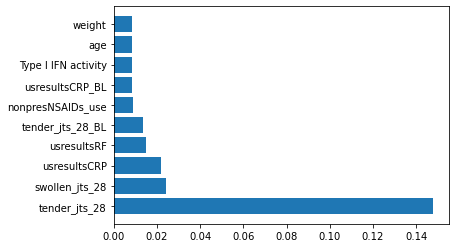

In [17]:
random_forest(X_train, X_test, Y_train, Y_test)

In [18]:
# Imput by test